In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import scipy.fftpack as fft
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from jupyterthemes import jtplot

In [3]:
jtplot.reset()
# plt.switch_backend('nbAgg')
plt.style.use("bmh")
plt.rcParams["axes.axisbelow"] = True
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (16/2, 9/2)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["text.latex.preamble"] = [r"\usepackage{physics}", r"\usepackage{url}"]

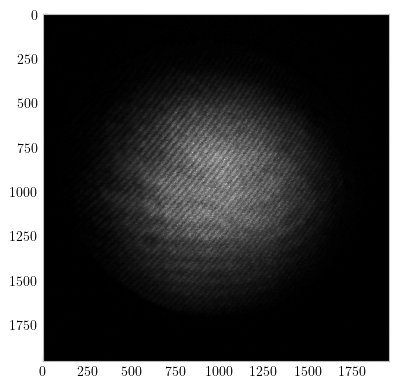

In [4]:
img = cv.imread('img-0354.png', 0)
plt.imshow(img, 'gray')
plt.grid(0)
plt.show()

D:\ProgramData\Anaconda3\envs\compsense\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


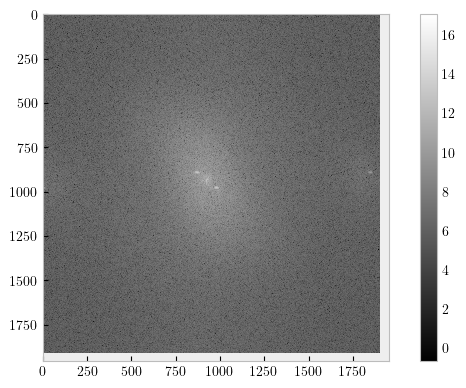

In [43]:
FZ = fft.fftshift(fft.fft2(img))
cv.circle(abs(FZ), center=(923, 933), radius=25, color=(0, 0, 0), thickness=-1)
cv.circle(abs(FZ), center=(976, 976), radius=25, color=(0, 0, 0), thickness=-1)
new_center = (1032, 1020)
M = np.array([[1, 0, FZ.shape[1]//2-new_center[0]],
              [0, 1, FZ.shape[0]//2-new_center[1]]], 'float32')
FZ = cv.warpAffine(abs(FZ), M, FZ.shape)
plt.imshow(np.log(abs(FZ)), 'gray')
plt.grid(0)
plt.colorbar()
plt.show()

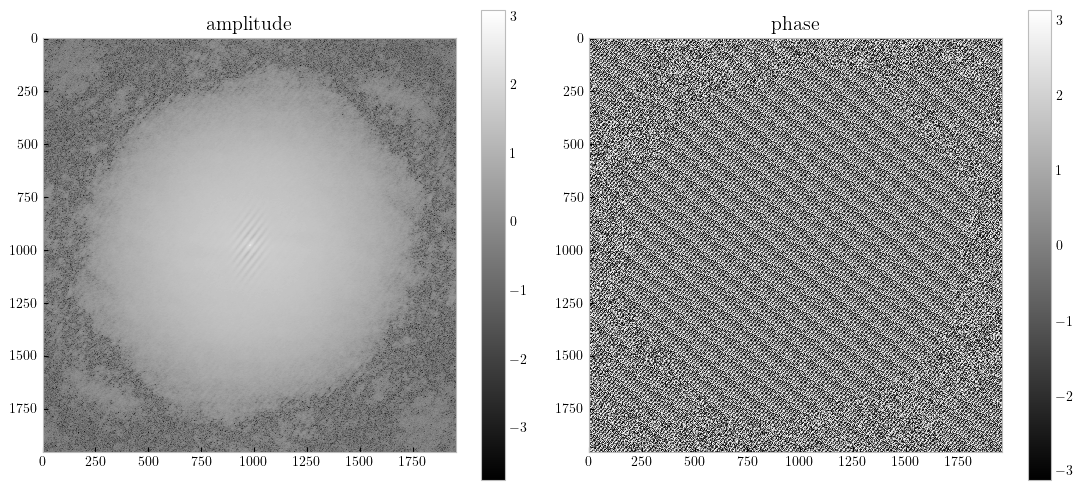

In [48]:
SZ = fft.fftshift(fft.ifft2(FZ))
fig = plt.figure(figsize=(5*2.25, 5))

ax = fig.add_subplot(121)
cax = ax.imshow(np.log10(abs(SZ)), 'gray')
ax.grid(0)
ax.set_title('amplitude')
fig.colorbar(cax)

ax = fig.add_subplot(122)
cax = ax.imshow(np.angle(SZ), 'gray')
ax.grid(0)
ax.set_title('phase')
fig.colorbar(cax)

plt.tight_layout()
plt.show()